# Data Cleaning & Description

Morgan Nielsen & Sarah Winters

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In our project, we aim to analyze data pertaining to railroad dispatchers, individuals with non-traditional work and sleep patterns. The dataset meticulously records the sleep and work schedules of numerous employees spanning slightly over a month. Prior to delving into data exploration and cleansing processes, our primary objective is to use the  information as efficiently as possible to predict future trends among employees.


To assess the accuracy of our predictions, we have identified another dataset featuring information about railroad signalmen. This supplementary dataset, which shares similarities with our primary dataset, serves as a valuable benchmark for comparison. Our approach involves predicting the potential impact on future months based on the collective data, thus steering clear of using the current dataset for the validation of our predictions. Instead, the distinct dataset acts as an external point of reference to validate the credibility of our predictive outcomes.


In [3]:
# used pip install to install this package needed for importing a excel spreadsheet
!pip install xlrd


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [4]:
# read in the xls (Excel File) into a pandas dataframe 
dispatcher_data = pd.read_excel("Dispatchers_Daily_Log.xls")

# print out basic information about the dataframe 
print(dispatcher_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6202 entries, 0 to 6201
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             6202 non-null   int64         
 1   Date                           6202 non-null   datetime64[ns]
 2   Type_of_day                    6202 non-null   int64         
 3   Sleep_location                 6025 non-null   float64       
 4   Bed_time                       6005 non-null   datetime64[ns]
 5   Time_fell_asleep               6047 non-null   datetime64[ns]
 6   Time_woke_up                   6056 non-null   datetime64[ns]
 7   Time_got_up                    5995 non-null   datetime64[ns]
 8   No_times_awakened              5869 non-null   float64       
 9   Ease_of_falling_asleep         5987 non-null   float64       
 10  Ease_of_arising                5979 non-null   float64       
 11  Length_of_sleep  

In [5]:
# display a few dozen rows of the data
print(dispatcher_data.head(48))

    ID       Date  Type_of_day  Sleep_location            Bed_time  \
0    2 2006-04-26            1             1.0 2006-04-26 01:30:00   
1    2 2006-04-27            1             1.0 2006-04-27 01:30:00   
2    2 2006-04-28            1             1.0 2006-04-28 01:00:00   
3    2 2006-04-29            1             1.0 2006-04-29 03:00:00   
4    2 2006-04-30            1             1.0 2006-04-30 02:15:00   
5    2 2006-05-01            2             1.0 2006-05-01 03:30:00   
6    2 2006-05-02            2             1.0 2006-05-02 01:30:00   
7    2 2006-05-03            1             1.0 2006-05-03 02:15:00   
8    2 2006-05-04            1             1.0 2006-05-04 01:00:00   
9    2 2006-05-05            1             1.0 2006-05-05 02:00:00   
10   2 2006-05-06            1             1.0 2006-05-06 03:00:00   
11   2 2006-05-07            1             1.0 2006-05-07 02:30:00   
12   2 2006-05-08            2             1.0 2006-05-08 01:00:00   
13   2 2006-05-09   

Upon printing out a substantial portion of the dataset, it becomes evident that the volume of information is considerable, suggesting potential opportunities for our analysis. From our previous knowledge of this dataset, this was not unexpected. However, an essential step in enhancing the dataset's utility involves the removal of unnecessary columns that do not contribute significantly to our study or project. By paring down the dataset to retain only essential features, we aim to refine the focus of our analysis and optimize computational efficiency.


In terms of feature engineering, there is a recognition that certain variables might benefit from transformation or combination to extract more meaningful insights. For instance, creating composite features representing cumulative work hours or designing a metric for sleep efficiency could contribute to a more nuanced understanding of railroad dispatchers' schedules. We will consider and try many different engineering techniques  in our future analysis.

In [6]:
# check for missing data 
missing_data = dispatcher_data.isnull().sum()
print("Missing Data:")
print(missing_data)

Missing Data:
ID                                  0
Date                                0
Type_of_day                         0
Sleep_location                    177
Bed_time                          197
Time_fell_asleep                  155
Time_woke_up                      146
Time_got_up                       207
No_times_awakened                 333
Ease_of_falling_asleep            215
Ease_of_arising                   223
Length_of_sleep                   219
Quality_of_sleep                  221
How_feel_morning                  219
Nap1_time_fell_asleep            4734
Nap1_time_awoke                  4734
Nap2_time_fell_asleep            6070
Nap2_time_awoke                  6070
Nap3_time_fell_asleep            6195
Nap3_time_awoke                  6195
Time_began_commute_to_work       1737
Time_arrived_at_work             1741
How_feel_after_commute           1760
Time_started_work                1749
Time_at_midpoint_of_shift        1995
How_feel_at_midpoint_of_shift    179

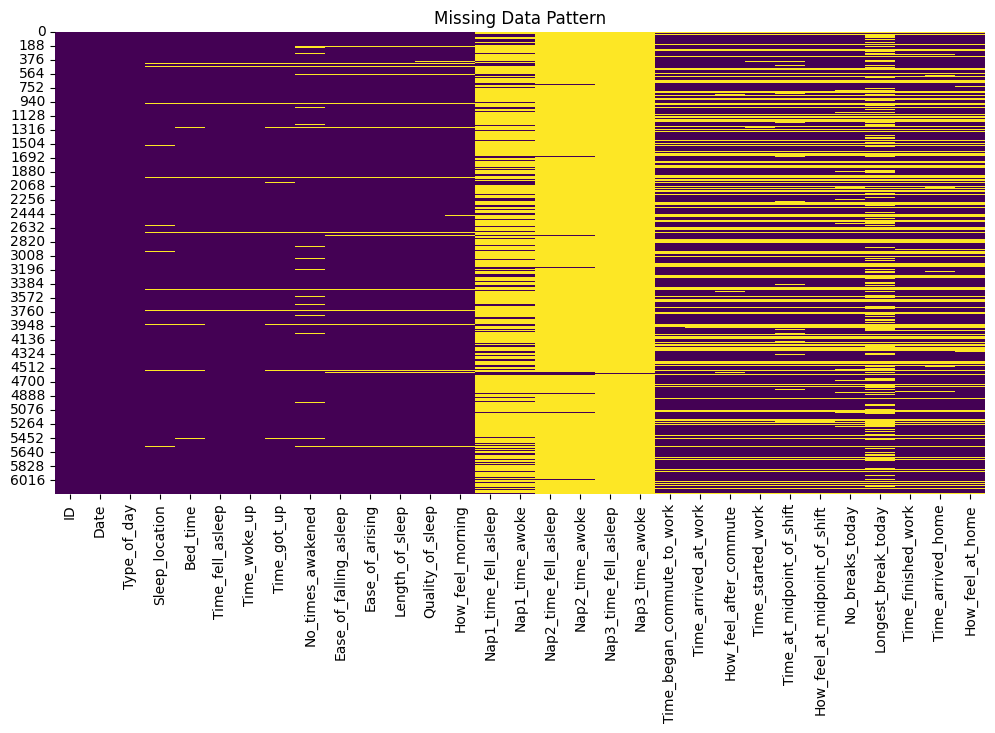

In [7]:
# OPTIONAL: Visualize missing data pattern
plt.figure(figsize=(12, 6))
sns.heatmap(dispatcher_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Pattern")
plt.show()

As we can see, the dataset has a noticeable amount of missing data; however, the proportion is relatively small when considered against the overall size of the dataset. A significant portion of the missing data pertains to columns, such as those recording nap-related information, that are not essential for our analysis. Consequently, we will drop these columns, streamlining the dataset for more focused examination. Some missing data also stems from the nature of the recorded activities. For instance, not every individual takes a nap every day, and there may be instances where not everyone is engaged in work on a daily basis throughout the 14-day period. This understanding of the data's context informs our approach to handling missing values, ensuring that the data cleaning process aligns with the practical aspects of the recorded activities.


We will drop all the columns related to napping data, and then together we decided we will keep the missing work values to try to analyze whether their sleep during “weekends” drastically changes or is still affected by their abnormal work schedules. As we continue with our analysis, we may contninue to drop columns, but as of now, we feel good about our dataset.

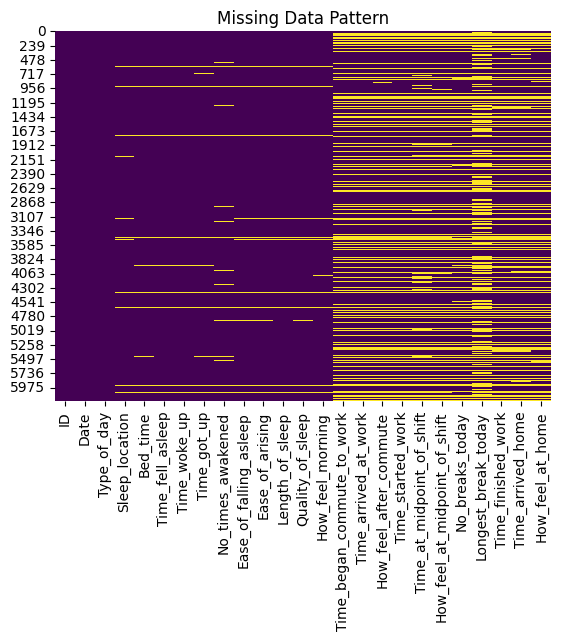

In [8]:
# drop the columns about naps
no_nap_dispatcher = dispatcher_data.drop(['Nap1_time_fell_asleep', 'Nap1_time_awoke', 'Nap2_time_fell_asleep', 'Nap2_time_awoke', 'Nap3_time_fell_asleep', 'Nap3_time_awoke'], axis=1)
sns.heatmap(no_nap_dispatcher.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Pattern")
plt.show()

There are still missing values in the columns related to sleep, but since it is only around 10% of the data, we plan to average out the values based on each employee. The code below allows us to see how many Nan values there are corresponding to each test subject, corresponding to the different ID numbers. We will use this information in our future analysis to help us decide how to average the missing values per employee.

In [9]:
grouped = no_nap_dispatcher.groupby('ID')

# Calculate the number of NaN values for each group
nan_counts = grouped.apply(lambda x: x.isnull().sum())

print(nan_counts)

     ID  Date  Type_of_day  Sleep_location  Bed_time  Time_fell_asleep  \
ID                                                                       
2     0     0            0               0         0                 0   
4     0     0            0               0         0                 0   
7     0     0            0               0         0                 0   
10    0     0            0               0         0                 0   
12    0     0            0               0         1                 0   
..   ..   ...          ...             ...       ...               ...   
956   0     0            0               0         0                 0   
959   0     0            0               0         0                 0   
960   0     0            0               0         0                 0   
961   0     0            0               0         0                 0   
963   0     0            0               0         0                 0   

     Time_woke_up  Time_got_up  No_ti

In [10]:
# now we revisit how many nan values there are in each column total
print(no_nap_dispatcher.isnull().sum())

ID                                  0
Date                                0
Type_of_day                         0
Sleep_location                    177
Bed_time                          197
Time_fell_asleep                  155
Time_woke_up                      146
Time_got_up                       207
No_times_awakened                 333
Ease_of_falling_asleep            215
Ease_of_arising                   223
Length_of_sleep                   219
Quality_of_sleep                  221
How_feel_morning                  219
Time_began_commute_to_work       1737
Time_arrived_at_work             1741
How_feel_after_commute           1760
Time_started_work                1749
Time_at_midpoint_of_shift        1995
How_feel_at_midpoint_of_shift    1797
No_breaks_today                  1859
Longest_break_today              3143
Time_finished_work               1836
Time_arrived_home                1875
How_feel_at_home                 1810
dtype: int64


I wanna see how much of the missing data corresponds with days that are type 2--AKA when the employee doesn't have work.

In [19]:
no_work_mask = no_nap_dispatcher['Type_of_day'] == 2
# apply the mask to the data frame
day_type_2 = no_nap_dispatcher[no_work_mask]
print(day_type_2.isnull().sum())

ID                                  0
Date                                0
Type_of_day                         0
Sleep_location                    118
Bed_time                          108
Time_fell_asleep                   79
Time_woke_up                       76
Time_got_up                       110
No_times_awakened                 168
Ease_of_falling_asleep            127
Ease_of_arising                   131
Length_of_sleep                   128
Quality_of_sleep                  132
How_feel_morning                  130
Time_began_commute_to_work       1702
Time_arrived_at_work             1702
How_feel_after_commute           1702
Time_started_work                1702
Time_at_midpoint_of_shift        1702
How_feel_at_midpoint_of_shift    1702
No_breaks_today                  1702
Longest_break_today              1702
Time_finished_work               1702
Time_arrived_home                1702
How_feel_at_home                 1702
dtype: int64


In [11]:
interpolated_df = no_nap_dispatcher.interpolate()
print(interpolated_df.isnull().sum())

ID                                  0
Date                                0
Type_of_day                         0
Sleep_location                      0
Bed_time                            0
Time_fell_asleep                    0
Time_woke_up                        0
Time_got_up                         0
No_times_awakened                   0
Ease_of_falling_asleep              0
Ease_of_arising                     0
Length_of_sleep                     0
Quality_of_sleep                    0
How_feel_morning                    0
Time_began_commute_to_work          0
Time_arrived_at_work                0
How_feel_after_commute              0
Time_started_work                   0
Time_at_midpoint_of_shift        1995
How_feel_at_midpoint_of_shift       0
No_breaks_today                     0
Longest_break_today              3143
Time_finished_work                  0
Time_arrived_home                   0
How_feel_at_home                    0
dtype: int64


In [12]:
interpolated_df.set_index('ID')

,Date,Type_of_day,Sleep_location,Bed_time,Time_fell_asleep,Time_woke_up,Time_got_up,No_times_awakened,Ease_of_falling_asleep,Ease_of_arising,...,Time_arrived_at_work,How_feel_after_commute,Time_started_work,Time_at_midpoint_of_shift,How_feel_at_midpoint_of_shift,No_breaks_today,Longest_break_today,Time_finished_work,Time_arrived_home,How_feel_at_home
ID,,,,,,,,,,,,,,,,,,,,,
2,2006-04-26,1,1.0,2006-04-26 01:30:00,2006-04-26 02:30:00,2006-04-26 07:50:00,2006-04-26 11:00:00,0.0,4.0,2.0,...,2006-04-26 14:35:00,3.0,2006-04-26 14:40:00,18:40:00,3.0,3.0,00:05:00,2006-04-26 22:40:00,2006-04-26 23:00:00,2.0
2,2006-04-27,1,1.0,2006-04-27 01:30:00,2006-04-27 02:30:00,2006-04-27 10:50:00,2006-04-27 10:50:00,1.0,4.0,4.0,...,2006-04-27 14:40:00,4.0,2006-04-27 14:45:00,18:40:00,4.0,3.0,00:10:00,2006-04-27 22:40:00,2006-04-27 22:55:00,3.0
2,2006-04-28,1,1.0,2006-04-28 01:00:00,2006-04-28 02:30:00,2006-04-28 09:30:00,2006-04-28 12:30:00,1.0,3.0,2.0,...,2006-04-28 14:40:00,4.0,2006-04-28 14:45:00,18:40:00,3.0,3.0,00:10:00,2006-04-28 22:45:00,2006-04-28 23:00:00,4.0
2,2006-04-29,1,1.0,2006-04-29 03:00:00,2006-04-29 03:30:00,2006-04-29 08:30:00,2006-04-29 12:00:00,1.0,5.0,1.0,...,2006-04-29 14:25:00,3.0,2006-04-29 14:35:00,18:30:00,3.0,2.0,00:10:00,2006-04-29 22:30:00,2006-04-29 22:50:00,3.0
2,2006-04-30,1,1.0,2006-04-30 02:15:00,2006-04-30 03:30:00,2006-04-30 09:00:00,2006-04-30 11:15:00,1.0,2.0,4.0,...,2006-04-30 14:30:00,4.0,2006-04-30 14:40:00,18:40:00,4.0,1.0,00:10:00,2006-04-30 22:30:00,2006-04-30 22:55:00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,2006-05-04,1,1.0,2006-05-03 21:00:00,2006-05-03 21:30:00,2006-05-04 04:20:00,2006-05-04 04:50:00,2.0,3.0,2.0,...,2006-05-04 06:25:00,3.0,2006-05-04 06:45:00,11:00:00,3.0,1.0,00:10:00,2006-05-04 15:00:00,2006-05-04 15:15:00,2.0
963,2006-05-05,1,1.0,2006-05-04 21:50:00,2006-05-04 22:05:00,2006-05-05 04:30:00,2006-05-05 04:50:00,2.0,2.0,2.0,...,2006-05-05 06:35:00,3.0,2006-05-05 06:45:00,11:00:00,2.0,2.0,00:10:00,2006-05-05 15:10:00,2006-05-05 15:35:00,2.0
963,2006-05-06,1,1.0,2006-05-05 21:00:00,2006-05-05 21:20:00,2006-05-06 04:50:00,2006-05-06 05:05:00,2.0,3.0,4.0,...,2006-05-06 06:30:00,4.0,2006-05-06 06:45:00,11:00:00,4.0,2.0,00:05:00,2006-05-06 15:00:00,2006-05-06 15:15:00,3.0


For our most important columns, I want to compare the graphs of the interpolated data and the data with the NaNs, to see how good a job it does at filling in the gaps.

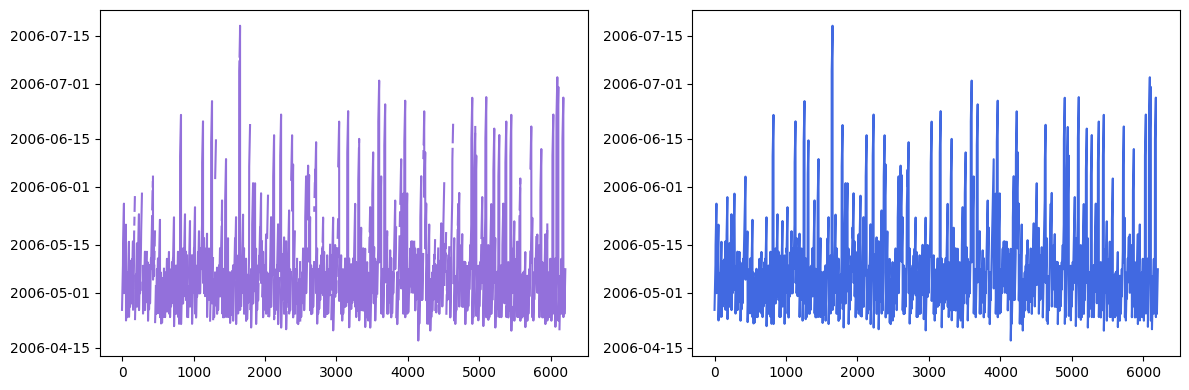

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(no_nap_dispatcher['Bed_time'], color='mediumpurple')
plt.subplot(1, 2, 2)
plt.plot(interpolated_df['Bed_time'], color='royalblue')
plt.tight_layout()
plt.show()

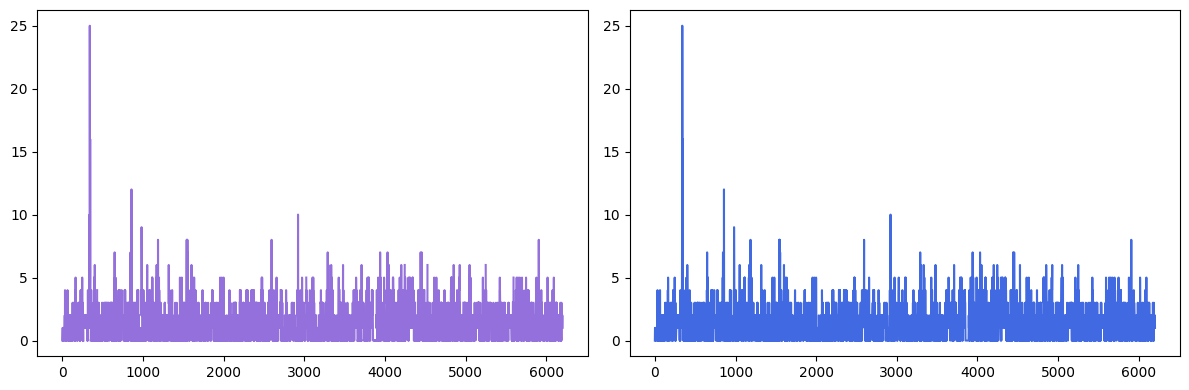

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(no_nap_dispatcher['No_times_awakened'], color='mediumpurple')
plt.subplot(1, 2, 2)
plt.plot(interpolated_df['No_times_awakened'], color='royalblue')
plt.tight_layout()
plt.show()

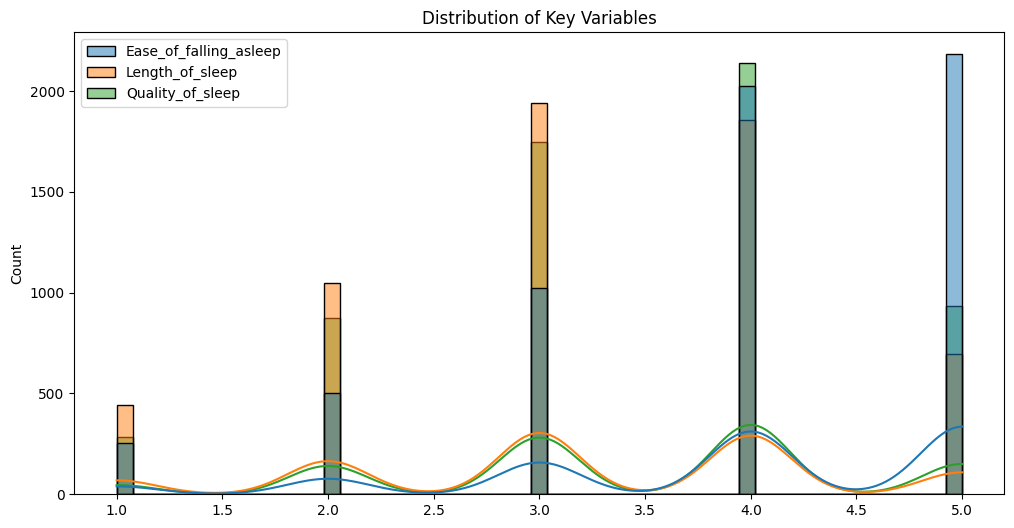

In [ ]:
plt.figure(figsize=(12, 6))
key_variables = ['Time_fell_asleep', 'Time_woke_up', 'Time_got_up', 'Ease_of_falling_asleep', 'Length_of_sleep', 'Quality_of_sleep']
sns.histplot(dispatcher_data[key_variables], kde=True) # input one/many of what we consider key variables !!
plt.title('Distribution of Key Variables')
plt.show()

The histogram is not very useful with our dataset considering that not all of our key variables are integers or floats. In contrast, this correlation matrix helps us to visualize the already present trends for each of the key variables. In the future analysis, we might consider doing this with the work variables as well to see if there are any noticeable trends.

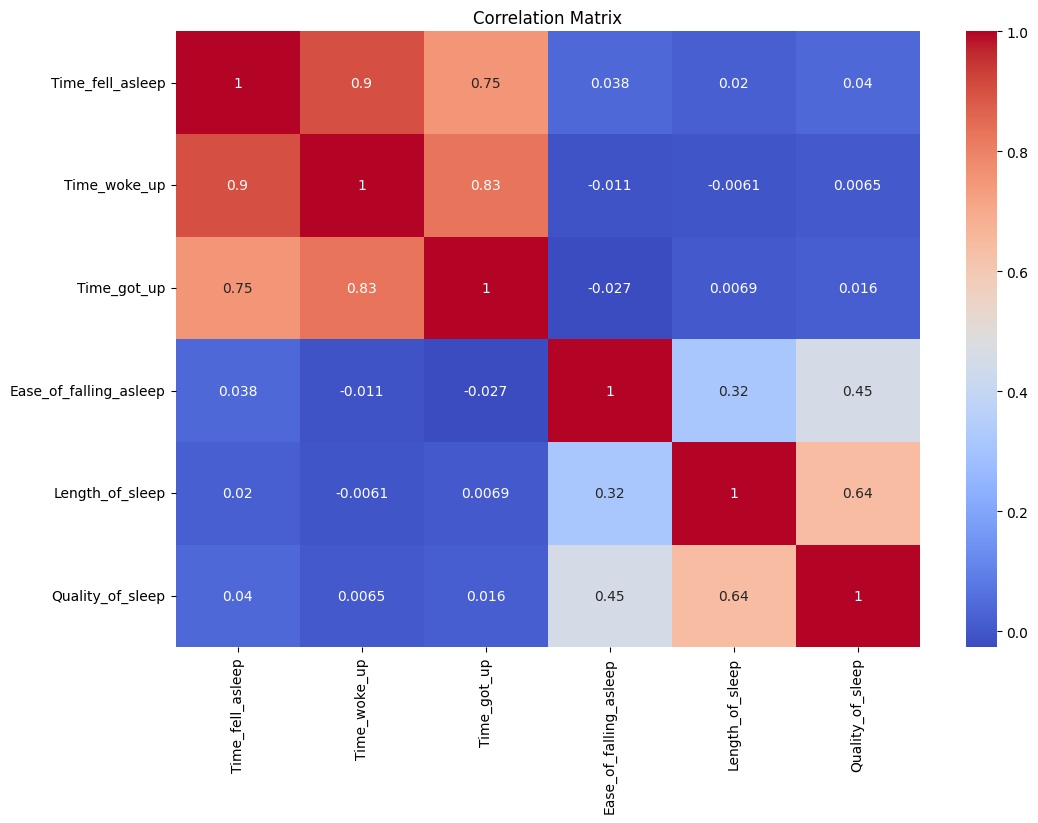

In [ ]:
# Exploring/Visualing the relationship between variables
plt.figure(figsize=(12,8))
sns.heatmap(dispatcher_data[key_variables].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In summary, the characteristics of the observed data prompted a reassessment of our analytical approach and how we should clean our data. Because of this, we thoroughly cleaned the dataset, ensuring its readiness for subsequent modeling endeavors. Among the potential models under consideration are Hidden Markov Models, Random Forest Models, and Linear Models. Each of these models is contingent upon specific assumptions, such as the assumption that the future state depends only on the current state and not on the sequence of events that preceded it, that features are relatively homogeneous in their predictive power across the dataset, or a linear relationship between the independent variables and the dependent variable, respectively. Moving forward, our analysis will delve deeper into these model options to ascertain which one aligns most effectively with our dataset.